# Tuning parameters for RNA, Ribo, and protein datasets

In [26]:
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ddn3 import tools, ddn
import parameter_tuning_parallel as parameter_tuning
reload(parameter_tuning)

<module 'parameter_tuning_parallel' from 'E:\\OneDrive - Virginia Tech\\x_code\\ddn\\try_exp\\data_qiuman\\parameter_tuning_parallel.py'>

In [28]:
# Put the three data in the same folder of this notebook
dat_rna = pd.read_csv("sub.expr.rna.transport", sep='\s+', header=None).to_numpy()
dat_ribo = pd.read_csv("sub.expr.ribo.transport", sep='\s+', header=None).to_numpy()
dat_protein = pd.read_csv("sub.expr.protein.transport", sep='\s+', header=None).to_numpy()

# The number of cores in the computer
cores = 16

Three data pairs

In [81]:
# dat1 = dat_rna
# dat2 = dat_ribo

# dat1 = dat_rna
# dat2 = dat_protein

dat1 = dat_ribo
dat2 = dat_protein

cv_max_deg = np.zeros(dat1.shape[1]) + 200

## First round of search of lambda1

In [82]:
l1_list_1 = np.arange(0.1, 0.805, 0.1)

In [83]:
dp_l1_1 = parameter_tuning.DDNParameterSearch(
    dat1,
    dat2,
    n_cv=5,
    ratio_validation=0.5, 
    lambda1_list=l1_list_1,
    lambda2_list=[0.05],
    cores=cores,
    cv_max_edge=cv_max_deg,
)

In [84]:
val_err_l1_1, _, _ = dp_l1_1.fit("cv_joint")

0 0 0 s0
0 0 0 s1
High rec error
0 1 0 s0
0 1 0 s1
0 2 0 s0
0 2 0 s1
0 3 0 s0
0 3 0 s1
0 4 0 s0
0 4 0 s1
0 5 0 s0
0 5 0 s1
0 6 0 s0
0 6 0 s1
0 7 0 s0
0 7 0 s1
1 0 0 s0
1 0 0 s1
High rec error
1 1 0 s0
1 1 0 s1
1 2 0 s0
1 2 0 s1
1 3 0 s0
1 3 0 s1
1 4 0 s0
1 4 0 s1
1 5 0 s0
1 5 0 s1
1 6 0 s0
1 6 0 s1
1 7 0 s0
1 7 0 s1
2 0 0 s0
2 0 0 s1
High rec error
2 1 0 s0
2 1 0 s1
2 2 0 s0
2 2 0 s1
2 3 0 s0
2 3 0 s1
2 4 0 s0
2 4 0 s1
2 5 0 s0
2 5 0 s1
2 6 0 s0
2 6 0 s1
2 7 0 s0
2 7 0 s1
3 0 0 s0
3 0 0 s1
High rec error
3 1 0 s0
3 1 0 s1
3 2 0 s0
3 2 0 s1
3 3 0 s0
3 3 0 s1
3 4 0 s0
3 4 0 s1
3 5 0 s0
3 5 0 s1
3 6 0 s0
3 6 0 s1
3 7 0 s0
3 7 0 s1
4 0 0 s0
4 0 0 s1
High rec error
4 1 0 s0
4 1 0 s1
4 2 0 s0
4 2 0 s1
4 3 0 s0
4 3 0 s1
4 4 0 s0
4 4 0 s1
4 5 0 s0
4 5 0 s1
4 6 0 s0
4 6 0 s1
4 7 0 s0
4 7 0 s1


The output (val_err_0) is of shape (number of CV, number of lambda1, number of lambda2)

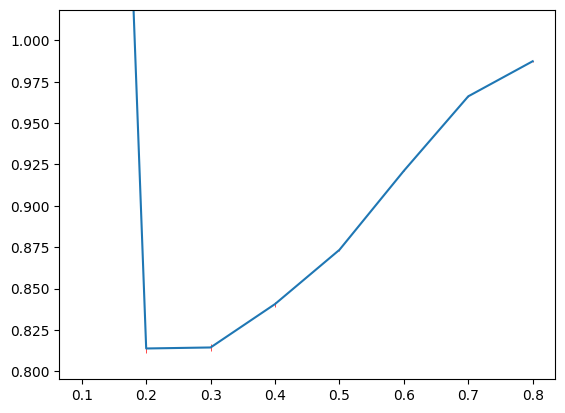

In [85]:
# val_avg = np.mean(val_err_l1_1, axis=0)
# val_std = np.std(val_err_l1_1, axis=0)
parameter_tuning.plot_error_1d(val_err_l1_1.squeeze(), lambda_lst=l1_list_1)

## Second round of search of lambda1
We use a smaller search range with finer grids based on the results of the first round

In [86]:
l1_list_2 = np.arange(0.15, 0.351, 0.025)

In [87]:
dp_l1_2 = parameter_tuning.DDNParameterSearch(
    dat1,
    dat2,
    n_cv=10,
    ratio_validation=0.5, 
    lambda1_list=l1_list_2,
    lambda2_list=[0.05,],
    cores=cores,
    cv_max_edge=cv_max_deg,
)

In [88]:
val_err_l1_2, _, _ = dp_l1_2.fit("cv_joint")

0 0 0 s0
0 0 0 s1
0 1 0 s0
0 1 0 s1
0 2 0 s0
0 2 0 s1
0 3 0 s0
0 3 0 s1
0 4 0 s0
0 4 0 s1
0 5 0 s0
0 5 0 s1
0 6 0 s0
0 6 0 s1
0 7 0 s0
0 7 0 s1
0 8 0 s0
0 8 0 s1
1 0 0 s0
1 0 0 s1
1 1 0 s0
1 1 0 s1
1 2 0 s0
1 2 0 s1
1 3 0 s0
1 3 0 s1
1 4 0 s0
1 4 0 s1
1 5 0 s0
1 5 0 s1
1 6 0 s0
1 6 0 s1
1 7 0 s0
1 7 0 s1
1 8 0 s0
1 8 0 s1
2 0 0 s0
2 0 0 s1
2 1 0 s0
2 1 0 s1
2 2 0 s0
2 2 0 s1
2 3 0 s0
2 3 0 s1
2 4 0 s0
2 4 0 s1
2 5 0 s0
2 5 0 s1
2 6 0 s0
2 6 0 s1
2 7 0 s0
2 7 0 s1
2 8 0 s0
2 8 0 s1
3 0 0 s0
3 0 0 s1
3 1 0 s0
3 1 0 s1
3 2 0 s0
3 2 0 s1
3 3 0 s0
3 3 0 s1
3 4 0 s0
3 4 0 s1
3 5 0 s0
3 5 0 s1
3 6 0 s0
3 6 0 s1
3 7 0 s0
3 7 0 s1
3 8 0 s0
3 8 0 s1
4 0 0 s0
4 0 0 s1
4 1 0 s0
4 1 0 s1
4 2 0 s0
4 2 0 s1
4 3 0 s0
4 3 0 s1
4 4 0 s0
4 4 0 s1
4 5 0 s0
4 5 0 s1
4 6 0 s0
4 6 0 s1
4 7 0 s0
4 7 0 s1
4 8 0 s0
4 8 0 s1
5 0 0 s0
5 0 0 s1
5 1 0 s0
5 1 0 s1
5 2 0 s0
5 2 0 s1
5 3 0 s0
5 3 0 s1
5 4 0 s0
5 4 0 s1
5 5 0 s0
5 5 0 s1
5 6 0 s0
5 6 0 s1
5 7 0 s0
5 7 0 s1
5 8 0 s0
5 8 0 s1
6 0 0 s0
6 0 0 s1
6 1 0 s0
6

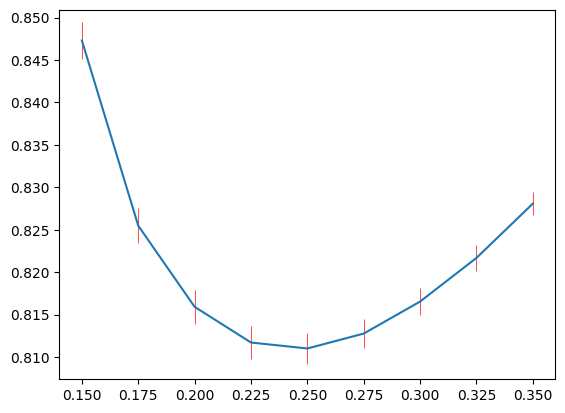

In [89]:
parameter_tuning.plot_error_1d(
    val_err_l1_2.squeeze(), lambda_lst=l1_list_2, 
    # ymin=0.80, ymax=0.82,
)

In [90]:
val_avg = np.mean(val_err_l1_2, axis=0)
# val_std = np.std(val_err_l1_2, axis=0)
l1_est = l1_list_2[np.argmin(val_avg)]
print(l1_est)

0.24999999999999997


## Search for lambda2

In [91]:
l2_list = np.arange(0.025, 0.201, 0.025)

In [92]:
dp_l2_1 = parameter_tuning.DDNParameterSearch(
    dat1,
    dat2,
    n_cv=10,
    ratio_validation=0.5, 
    lambda1_list=[0.25, ],
    lambda2_list=l2_list,
    cores=cores,
    cv_max_edge=cv_max_deg,
)

In [93]:
val_err_l2_1, _, _ = dp_l2_1.fit("cv_joint")

0 0 0 s0
0 0 0 s1
0 0 1 s0
0 0 1 s1
0 0 2 s0
0 0 2 s1
0 0 3 s0
0 0 3 s1
0 0 4 s0
0 0 4 s1
0 0 5 s0
0 0 5 s1
0 0 6 s0
0 0 6 s1
0 0 7 s0
0 0 7 s1
1 0 0 s0
1 0 0 s1
1 0 1 s0
1 0 1 s1
1 0 2 s0
1 0 2 s1
1 0 3 s0
1 0 3 s1
1 0 4 s0
1 0 4 s1
1 0 5 s0
1 0 5 s1
1 0 6 s0
1 0 6 s1
1 0 7 s0
1 0 7 s1
2 0 0 s0
2 0 0 s1
2 0 1 s0
2 0 1 s1
2 0 2 s0
2 0 2 s1
2 0 3 s0
2 0 3 s1
2 0 4 s0
2 0 4 s1
2 0 5 s0
2 0 5 s1
2 0 6 s0
2 0 6 s1
2 0 7 s0
2 0 7 s1
3 0 0 s0
3 0 0 s1
3 0 1 s0
3 0 1 s1
3 0 2 s0
3 0 2 s1
3 0 3 s0
3 0 3 s1
3 0 4 s0
3 0 4 s1
3 0 5 s0
3 0 5 s1
3 0 6 s0
3 0 6 s1
3 0 7 s0
3 0 7 s1
4 0 0 s0
4 0 0 s1
4 0 1 s0
4 0 1 s1
4 0 2 s0
4 0 2 s1
4 0 3 s0
4 0 3 s1
4 0 4 s0
4 0 4 s1
4 0 5 s0
4 0 5 s1
4 0 6 s0
4 0 6 s1
4 0 7 s0
4 0 7 s1
5 0 0 s0
5 0 0 s1
5 0 1 s0
5 0 1 s1
5 0 2 s0
5 0 2 s1
5 0 3 s0
5 0 3 s1
5 0 4 s0
5 0 4 s1
5 0 5 s0
5 0 5 s1
5 0 6 s0
5 0 6 s1
5 0 7 s0
5 0 7 s1
6 0 0 s0
6 0 0 s1
6 0 1 s0
6 0 1 s1
6 0 2 s0
6 0 2 s1
6 0 3 s0
6 0 3 s1
6 0 4 s0
6 0 4 s1
6 0 5 s0
6 0 5 s1
6 0 6 s0
6 0 6 s1
6 0 7 s0
6

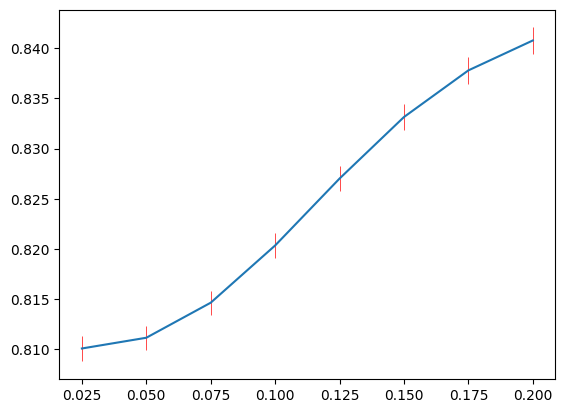

In [94]:
parameter_tuning.plot_error_1d(val_err_l2_1.squeeze(), lambda_lst=l2_list)

In [95]:
val_avg = np.mean(val_err_l2_1, axis=0)
# val_std = np.std(val_err_l2_1, axis=0)
l2_est = l2_list[np.argmin(val_avg)]
print(l2_est)

0.025


## Run DDN using the selected parameters

In [ ]:
g_beta_est = ddn.ddn_parallel(
    dat1,
    dat2,
    lambda1=0.275,
    lambda2=0.1,
    n_process=cores,
)

# Networks under two conditions
g1_net_est = tools.get_net_topo_from_mat(g_beta_est[0])
g2_net_est = tools.get_net_topo_from_mat(g_beta_est[1])